# Patch Tuesday - Vulnerability Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading Processed Data for Analysis

### Procedure

1. **Reading CSV Data**:
   - The `pd.read_csv` function from the pandas library is used to read the data stored in the CSV file located at `'.../../data/patch_tuesday/processed/patch_tuesday_prioritized.csv'`.
   - This file contains the processed data that integrates MSRC updates, EPSS scores, and CISA KEV data, which was previously prepared and saved in an earlier step of the workflow.

2. **DataFrame Storage**:
   - The data read from the CSV file is stored in the DataFrame `patch_tuesday_df`. This DataFrame will serve as the primary data structure from which all further data manipulations, analyses, and visualizations will be conducted.


In [2]:
patch_tuesday_df = pd.read_csv("../../data/patch_tuesday/processed/patch_tuesday_prioritized.csv")

## Visualization of CVE CVSS Scores Distribution

This section of the notebook is dedicated to visualizing the distribution of the maximum Common Vulnerability Scoring System (CVSS) scores across the vulnerabilities identified in the Patch Tuesday updates. This helps us understand the severity of the vulnerabilities that have been addressed.

This visualization is a critical tool for quickly assessing the range and commonality of vulnerability severities within the latest Patch Tuesday release, aiding in prioritization and risk assessment processes.

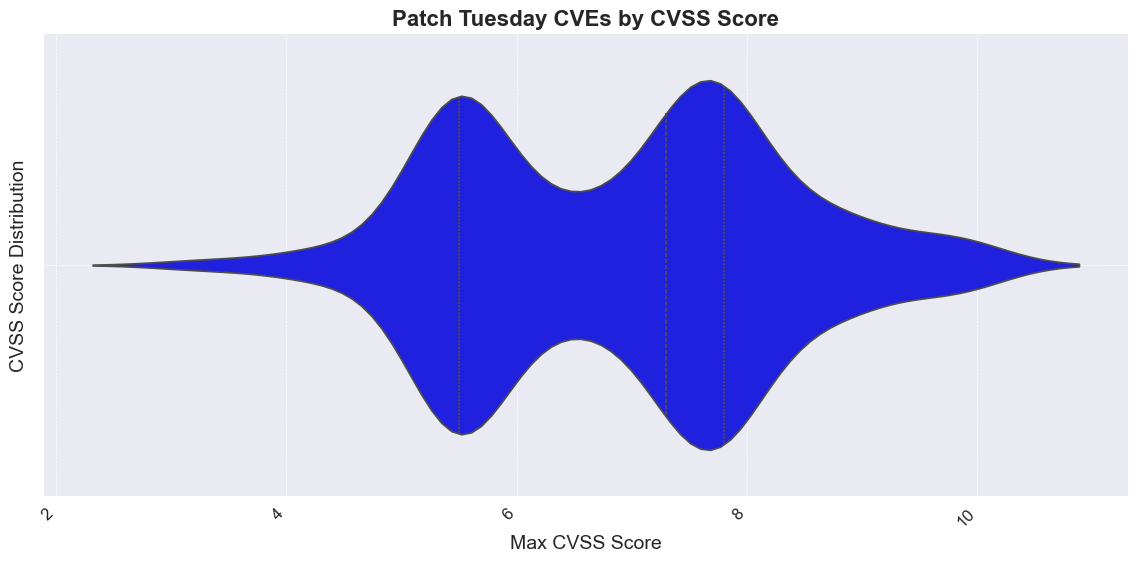

In [3]:
fig, axes = plt.subplots(figsize=(14, 6))
sns.set_style("whitegrid")

sns.violinplot(data=patch_tuesday_df, x="CVSS", ax=axes, inner="quartile", color="blue")

plt.title("Patch Tuesday CVEs by CVSS Score", fontsize=16, fontweight="bold")
plt.xlabel("Max CVSS Score", fontsize=14)
plt.ylabel("CVSS Score Distribution", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
axes.grid(True, which="both", linestyle="--", linewidth=0.5)

sns.despine()

plt.show()

## Visualizing CVE Severity Distribution

This section of the notebook uses a bar plot to display the distribution of CVE (Common Vulnerabilities and Exposures) severities identified in the latest Patch Tuesday reports. The visualization helps stakeholders quickly grasp the urgency and distribution of severities within the newly released vulnerabilities.

This bar plot provides a straightforward visualization of the severity distribution among the reported vulnerabilities, enabling quick insights into the security landscape for the observed period. It supports better resource allocation and risk management by highlighting the most critical areas based on severity.

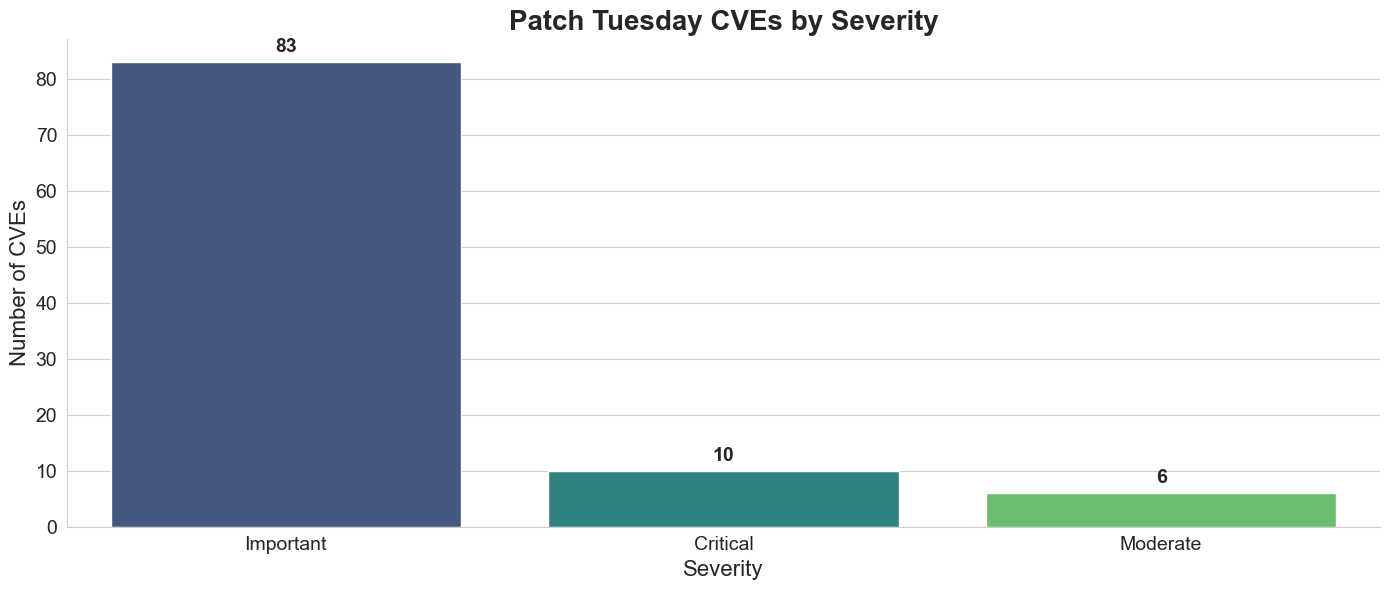

In [4]:
# Count the number of CVEs for each severity level
severity_counts = patch_tuesday_df["Severity"].value_counts()

# Set up the figure and axis
_, ax = plt.subplots(figsize=(14, 6))
sns.set_style("whitegrid")

# Create the bar plot
palette = sns.color_palette("viridis", len(severity_counts))
sns.barplot(
    x=severity_counts.index,
    y=severity_counts.values,
    palette=palette,
    ax=ax,
    hue=severity_counts.index,
    legend=False,
)

# Set the title and labels with custom fonts and sizes
plt.title("Patch Tuesday CVEs by Severity", fontsize=20, fontweight="bold")
plt.xlabel("Severity", fontsize=16)
plt.ylabel("Number of CVEs", fontsize=16)

# Add annotations on top of each bar
for i in range(len(severity_counts)):
    ax.text(
        i,
        severity_counts.values[i] + 1,
        f"{severity_counts.values[i]}",
        ha="center",
        va="bottom",
        fontsize=14,
        fontweight="bold",
    )

# Rotate x-axis labels if necessary
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Adding a caption
fig.text(
    0.5,
    -0.05,
    "Data Source: Patch Tuesday Vulnerability Reports",
    ha="center",
    fontsize=12,
    color="gray",
)

plt.tight_layout()
plt.show()

## Visualizing CVE Distribution by Product

This section of the notebook is dedicated to visualizing the distribution of Common Vulnerabilities and Exposures (CVEs) across different products as reported in the latest Patch Tuesday data. The visualization aims to provide a clear picture of which products are most frequently affected by vulnerabilities, aiding in prioritization and resource allocation for patching efforts.

This bar plot serves as an effective tool for quickly identifying which products are most vulnerable based on the latest Patch Tuesday releases. Organizations can use this information to prioritize their security measures and patch management strategies accordingly, focusing resources on the most impacted products.

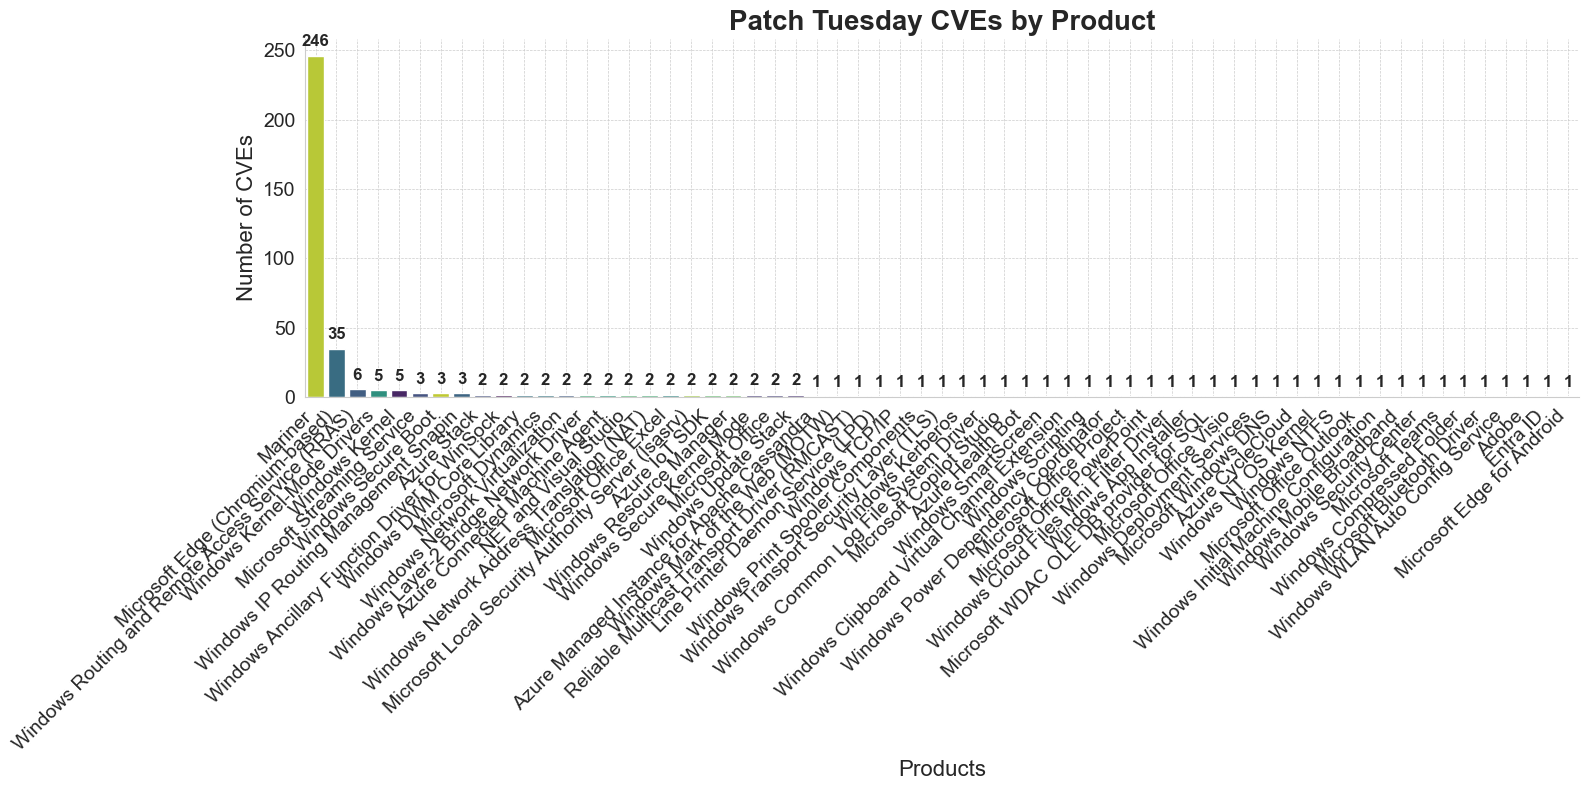

In [5]:
sns.set_style("whitegrid")

num_products = patch_tuesday_df["Product"].nunique()

fig, axes = plt.subplots(figsize=(16, 8))

palette = sns.color_palette("viridis", num_products)
sns.countplot(
    data=patch_tuesday_df,
    x="Product",
    ax=axes,
    order=patch_tuesday_df["Product"].value_counts().index,
    palette=palette,
    hue="Product",
    legend=False,
)

plt.title("Patch Tuesday CVEs by Product", fontsize=20, fontweight="bold")
plt.xlabel("Products", fontsize=16)
plt.ylabel("Number of CVEs", fontsize=16)

plt.xticks(rotation=45, ha="right", fontsize=14)

plt.yticks(fontsize=14)

axes.grid(True, which="both", linestyle="--", linewidth=0.5)

for p in axes.patches:
    axes.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
        fontsize=12,
        fontweight="semibold",
    )

sns.despine()
plt.tight_layout()
plt.show()

## Visualizing CVE Distribution by Weighted Vulnerability Score

This section of the notebook is dedicated to visualizing the distribution of Common Vulnerabilities and Exposures (CVEs) by their weighted vulnerability scores as reported in the latest Patch Tuesday data. The visualization aims to provide a clear picture of the distribution and density of these scores, aiding in prioritization and resource allocation for patching efforts.

The violin plot serves as an effective tool for understanding the spread, central tendency, and variability of the weighted vulnerability scores. The violin plot shows the density of the scores at different values, while the inner quartiles highlight the median and interquartile range (IQR), providing a summary of the central tendency and variability.

This visualization aids in quickly grasping the overall distribution characteristics of the weighted vulnerability scores, identifying trends, and making informed decisions in vulnerability management.

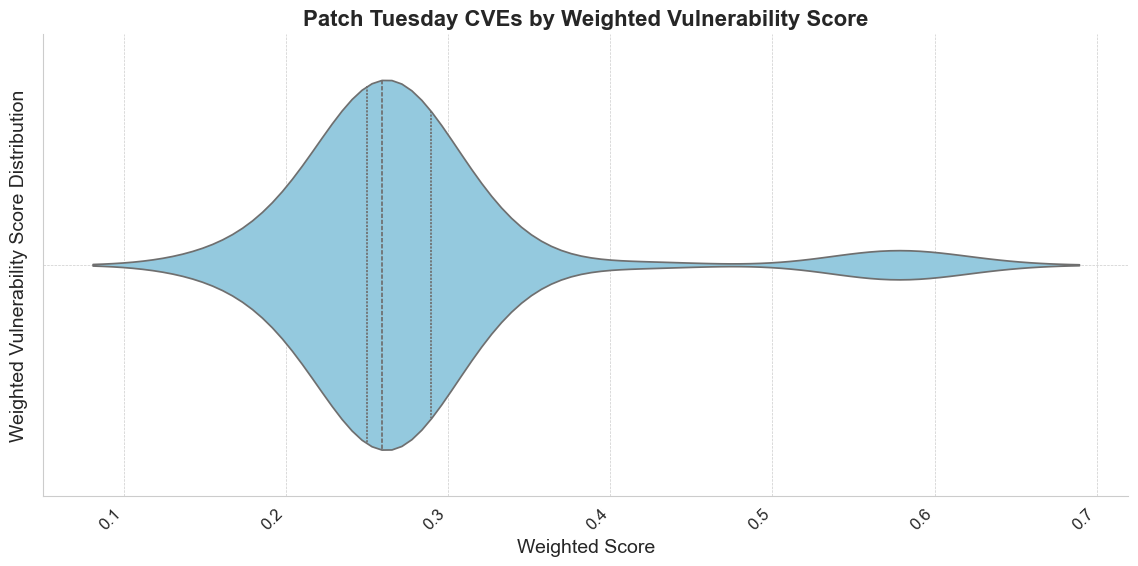

In [6]:
fig, axes = plt.subplots(figsize=(14, 6))
sns.set_style("whitegrid")

sns.violinplot(
    data=patch_tuesday_df,
    x="Weighted_Vulnerability_Score",
    ax=axes,
    inner="quartile",
    color="skyblue",
)

plt.title(
    "Patch Tuesday CVEs by Weighted Vulnerability Score", fontsize=16, fontweight="bold"
)
plt.xlabel("Weighted Score", fontsize=14)
plt.ylabel("Weighted Vulnerability Score Distribution", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
axes.grid(True, which="both", linestyle="--", linewidth=0.5)

sns.despine()

plt.show()